In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Codveda_tasks/task2/churn-bigml-80.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
data.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [7]:

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns to encode:", categorical_cols)


data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

display(data_encoded.head())

Categorical columns to encode: Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object')


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes,Churn_True
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,True,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,True,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,True,False,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,True,False,False


In [9]:
columns_to_scale = data_encoded.columns.tolist()
columns_to_scale.remove('Churn_True')

scaler = StandardScaler()
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

display(data_encoded.head())

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes,Churn_True
0,0.692163,-0.527811,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,...,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.335690,1.623917,False
1,0.161278,-0.527811,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,...,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.335690,1.623917,False
2,0.919686,-0.527811,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,...,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.335690,-0.615795,False
3,-0.420168,-0.692467,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,...,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,2.978938,-0.615795,False
4,-0.647691,-0.527811,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,...,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,2.978938,-0.615795,False


In [10]:
X = data_encoded.drop('Churn_True', axis=1)
y = data_encoded['Churn_True']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2132, 68)
Testing set shape: (534, 68)


In [23]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [24]:

coefficients = model.coef_[0]
intercept = model.intercept_[0]


coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
})


coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print("Model Intercept:", intercept)
print("\nModel Coefficients and Odds Ratios:")
display(coef_df)

Model Intercept: -0.7764015228226414

Model Coefficients and Odds Ratios:


,Feature,Coefficient,Odds Ratio
67,Voice mail plan_Yes,-0.891863,0.409891
66,International plan_Yes,0.830891,2.295364
15,Customer service calls,0.811370,2.250989
2,Number vmail messages,0.515978,1.675276
3,Total day minutes,0.399077,1.490449
...,...,...,...
61,State_VT,0.021984,1.022228
56,State_SD,0.020497,1.020708
7,Total eve calls,0.015705,1.015829
28,State_ID,-0.013112,0.986974


In [25]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7603
Precision: 0.3515
Recall: 0.7342
F1-score: 0.4754


In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.4f}")

AUC: 0.7802


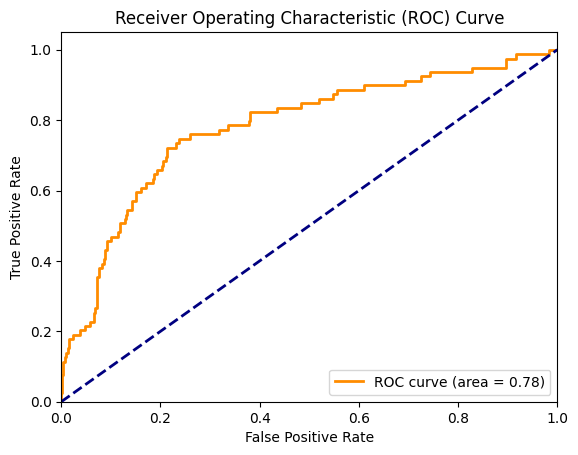

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.7603
Precision: 0.3515
Recall: 0.7342
F1-score: 0.4754


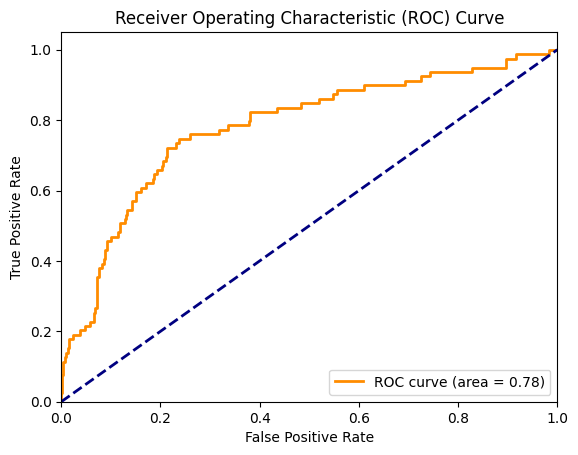

In [29]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()